In [1]:
# Standard library imports
import os
import logging
from typing import Tuple

# PyPI imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_curve, precision_recall_curve
from tensorflow import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Random
random_state=315

# Fix Tensorflow's global random seed
random.set_seed(random_state)

# Suppress warning and info messages from tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

# Input data
data_file='../data/resampled_disaster_data_all.parquet'

2025-01-23 21:00:02.876255: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 21:00:07.060631: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 21:00:09.526529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737666012.447296    1060 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737666013.174810    1060 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 21:00:18.851694: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
data_df=pd.read_parquet(data_file)

total_disaster_months=len(data_df[data_df['incidents_binary'] != 0])
percent_disaster_months=(total_disaster_months/len(data_df)) * 100
print(f'Have {total_disaster_months}({percent_disaster_months:.1f}%) disaster months\n')

data_df.info()

Have 1986(4.7%) disaster months

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41899 entries, (np.int64(1955), 'AK', np.int64(1)) to (np.int64(2019), 'WY', np.int64(12))
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   incidents         41899 non-null  float64
 1   month_sin         41899 non-null  float64
 2   month_cos         41899 non-null  float64
 3   AL                41899 non-null  int64  
 4   AR                41899 non-null  int64  
 5   AS                41899 non-null  int64  
 6   AZ                41899 non-null  int64  
 7   CA                41899 non-null  int64  
 8   CO                41899 non-null  int64  
 9   CT                41899 non-null  int64  
 10  DC                41899 non-null  int64  
 11  DE                41899 non-null  int64  
 12  FL                41899 non-null  int64  
 13  FM                41899 non-null  int64  
 14  GA                41899 non-null  in

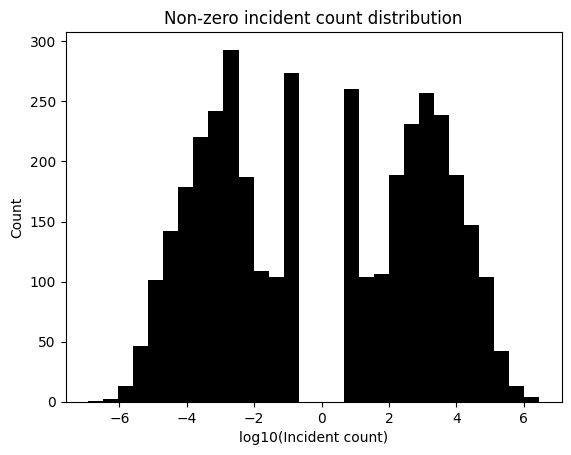

In [3]:
# Draw a quick plot to check the distribution of disaster counts
plt.title('Non-zero incident count distribution')
plt.hist(data_df['incidents'][data_df['incidents'] != 0], bins=30, color='black')
plt.xlabel('log10(Incident count)')
plt.ylabel('Count')
plt.show()